In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py as h5

#Quick fudge to make import from ../Scripts work
sys.path.append('../../Scripts')

#Custom imports
# for color map
import seaborn as sns
# for reading datafiles 
import pandas as pd

# import script that has formation channel classification functions:
from PostProcessingScripts import * 



from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))



from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [2]:



MSSFRnameslistWantedOrder = []
MSSFRnameslistWantedOrder.append('000') # add phenomenological 

for ind_GSMF, GSMF in enumerate([0,1,2]):
    ind_x = ind_GSMF + 1
    for ind_MZ, MZ in enumerate([0,1,2]):
        ind_y = ind_MZ +1
        for ind_SFR, SFR in enumerate([0,1,2]):
            ind_z = ind_SFR+1
            
            
            
            
        

            MSSFRnameslistWantedOrder.append('%s%s%s'%(ind_x, ind_y, ind_z))
            
        


indexlist = np.asarray(range(28))

indexOrderedToOldMSSFR = []
for mssfr in MSSFRnameslistWantedOrder:
    mask = (np.asarray(MSSFRnameslist)==mssfr)
    ind_map = indexlist[mask]
    indexOrderedToOldMSSFR.append(int(ind_map[...].squeeze()))
    
    



dictOldmssfrINDtoNEWmssfrIND = {MSSFRnameslist[i]: indexOrderedToOldMSSFR[i] for i in range(len(MSSFRnameslist))}



print(dictOldmssfrINDtoNEWmssfrIND['321'])

8


In [3]:
def plotConfidenceIntervals(DCOtype='BHNS', BPSnameslist=['A'], xvarind=0, axe=None, ylim=[0,1], xlabel='xlabel', \
                            ylabel='ylabel', pathQuantiles='name', pathGWTC='name'):
    """  
    options:
    
    DCOtype:      'BHNS' ,'BHBH' or 'NSNS', which type of Double compact object to plot  (str)
    BPSnameslist: list of alphabetical letters. The function will plot the models given in the list 
                    [no guarentee that not chosing the default 15 models will give a good layout] (list)
                    xvarind: index of the variable in the list to plot, options are: ['Mass1', 'Mass2', 'tc',\
                    'log10(tc)', 'TotMass', 'ChirpMass', 'q', Z, log(Z)] (so the index between 0 and 8) if you want
                    to add your own parameter you need to add this to the ConfidenceIntervals_model (..) .csv files (int)
    axe:           the axe on which to plot this parameter (axes object)
    ylim:          list of ymin and ymax values for the ylims (list)
    xlabel:        name of the xlabel (str) 
    ylabel:        name of the ylabel (str)
    pathQuantiles: path to the csv files that contain the distribution quantiles (str) 
     
    """
    
    
    BPScolors       = sns.color_palette("husl", len(BPSnameslist))
    #     BPScolors =  = [cm(x) for x in np.linspace(0,1 , (len(BPSnameslist)))] 
    
#     BPScolors = ['crimson', 'purple', 'mediumblue', 'deepskyblue', 'teal', 'yellowgreen', 'gold', 'darkorange', 'orangered', 'red']
    markerstyles = ['+', 'x', 'o', 'x', '+']
    quantileStrings = ['0.005', '0.05', '0.16', '0.25', '0.5', '0.75', '0.84', '0.95', '0.995']
 
    minq0_005= 100
    minq0_05 = 100
    minq0_25 =100
    maxq0_75 = -10
    maxq0_95 = -10
    maxq0_995= -10 
    

    
    
    xright =1+0.05
    xxx = (len(BPSnameslist)+xright)-1
    for ind_m, BPSmodelName in enumerate(BPSnameslist):
        dfname = pathQuantiles + 'ConfidenceIntervals_model_' + BPSmodelName + '_' + DCOtype + '.csv'
#         print('now at BPS model name =', BPSmodelName)
        df = pd.read_csv(dfname, header=[0], index_col=[0], skiprows=[1])

            
        ind_max = len(MSSFRnameslist) + xvarind*len(MSSFRnameslist)
        ind_min = xvarind*len(MSSFRnameslist)
        
        dx = 0.4 #0.3
        dxrange = np.linspace(-dx, +dx, len(MSSFRnameslist)+1) + ind_m
        dxlen = (2*dx)/len(MSSFRnameslist)
        for ind_mssfr, MSSFRname in enumerate(MSSFRnameslist):
        
            q0_005= (df.iloc[0][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[MSSFRname]]#[ind_mssfr] #
            q0_05 = (df.iloc[1][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[MSSFRname]]#[ind_mssfr]
            q0_25 = (df.iloc[3][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[MSSFRname]]#[ind_mssfr]
            q0_5 = (df.iloc[4][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[MSSFRname]]#[ind_mssfr]
            q0_75 = (df.iloc[5][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[MSSFRname]]#[ind_mssfr]
            q0_95 = (df.iloc[7][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[MSSFRname]]#[ind_mssfr]
            q0_995=(df.iloc[8][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[MSSFRname]]#[ind_mssfr]

            
            if xvarind ==7:
                # we want actually the log(Z) values:
                Zsolar = 0.0142 # solor metallicity
                q0_005, q0_05, q0_25, q0_5, q0_75, q0_95, q0_995 =\
                tfZ(q0_005), tfZ(q0_05), tfZ(q0_25), tfZ(q0_5), tfZ(q0_75), tfZ(q0_95), tfZ(q0_995)
                
#                 minq0_005, minq0_05, minq0_25, maxq0_75, maxq0_95, maxq0_995 = \
#                 tfZ(minq0_005), tfZ(minq0_05), tfZ(minq0_25), tfZ(maxq0_75), tfZ(maxq0_95), tfZ(maxq0_995)            
            
        
            minq0_005 = np.min([minq0_005, q0_005])
            minq0_05 = np.min([minq0_05, q0_05])
            minq0_25 = np.min([minq0_25, q0_25])
            
            maxq0_75 = np.max([maxq0_75, q0_75])
            maxq0_95 = np.max([maxq0_95, q0_95])
            maxq0_995 = np.max([maxq0_995, q0_995])
            
            

            
            for ind_q, interval in enumerate(['99percent', '90percent', '50percent', 'median']):
                
                xx = dxrange[ind_mssfr]
                
                if interval=='median':
                    if (ind_m==0) & (ind_mssfr==0):
                        axe.scatter(xx, q0_5, \
                                c=BPScolors[ind_m], s=80, label=None, \
                                marker='*', zorder=300, edgecolor='black')                        
                        
                    axe.scatter(xx, q0_5, \
                                c=BPScolors[ind_m], s=20, label=None, \
                                marker='.', zorder=200)        
                else:
                
                    if interval =='99percent':
                        zorder = 102
                        yy = [q0_005, q0_995]
                        alpha = 0.15
                    elif interval=='90percent':
                        zorder = 105
                        yy = [q0_05, q0_95]
                        alpha = 0.25    
                    elif interval=='50percent':
                        zorder = 110
                        yy = [q0_25, q0_75]
                        alpha = 0.4                         
                        
                    axe.bar(xx, height=(yy[1]-yy[0]), bottom=yy[0], color='white', alpha=1, \
                           width=dxlen, zorder=zorder-1)
                    axe.bar(xx, height=(yy[1]-yy[0]), bottom=yy[0], color=BPScolors[ind_m], alpha=alpha, \
                           width=dxlen, zorder=zorder)
############        

            
    xx = [-0.5, len(BPSnameslist)+xright]
    yymax90, yymin90 = [maxq0_95, maxq0_95],  [minq0_05, minq0_05]
    yymax99, yymin99 = [maxq0_995, maxq0_995],  [minq0_005, minq0_005]
    yymax50, yymin50 = [maxq0_75, maxq0_75],  [minq0_25, minq0_25]

    
    
    
    

    axe.fill_between(xx, y1=yymin99, y2=yymax99,   color='white', zorder=0 , alpha =1 )
    axe.fill_between(xx, y1=yymin99, y2=yymax99,   color='lightgray', zorder=1 , alpha =0.15 )
    
    axe.fill_between(xx, y1=yymin90, y2=yymax90,  color='white', zorder=2 , alpha =1 )
    axe.fill_between(xx, y1=yymin90, y2=yymax90,  color='lightgray', zorder=3 , alpha =0.5 )
    
    axe.fill_between(xx, y1=yymin50, y2=yymax50,  color='white', zorder=4 , alpha =1 )     
    axe.fill_between(xx, y1=yymin50, y2=yymax50,  color='lightgray', zorder=5 , alpha =0.8 )    


    
    axe.set_xlim(-0.5, len(BPSnameslist)+xright)

    axe.set_ylim(ylim[0], ylim[1])
    
    axe == layoutAxes(axe, nameX=xlabel, nameY=ylabel, fontsize=19)
    

    
    if (xvarind==7) | (xvarind==8):
        physicalnames = []
        for ind_m, bps_model in enumerate(BPSnameslist):
            physicalnames.append(r'\textbf{%s}'%(bps_model) )
        physicalnames.append(r'\textbf{GWTC}')
        axe.set_xticks(np.concatenate((range(len(BPSnameslist)), [xxx+0.5])))
        axe.set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,
    
#     if xvarind==0:

    ##### SECOND AXIS ######
    physicalnames=[]
    for ind_m, bps_model in enumerate(BPSnameslist):
        physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
    ax2y = axe.twiny()
    ax2y.set_xlim(-0.5, len(BPSnameslist)+xright)


    if xvarind==0:
        ax2y.set_xticks(range(len(BPSnameslist)))
        ax2y.set_xticklabels(physicalnames, fontsize=fs-8, rotation=30) 
    else:
        ax2y.set_xticks([])
        ax2y.set_xticklabels([]) 
 
    
    xxx = (len(BPSnameslist)+xright)-1
    axe.plot([xxx,xxx], [ylim[0],ylim[1]], color='k', lw=2, zorder=1E6)
    
    
    
    # not showing the axes ticks for figures if its not the bottom panel :-) 
    if (xvarind!=8) & (xvarind!=7):
        axe.get_xaxis().set_ticks([])
        axe.tick_params(bottom=False)
#         axe.set_xlabel(False)
#         axe.get_xaxis().set_visible(False)

    # for x axis turn off minor ticks
    else:
        axe.tick_params(axis='x', which='minor', bottom=False)

    # SHOW GWTC-1 and GWTC-2 results:
    if xvarind in [0,1,4,5,6]:

        if xvarind==0:
            ind_GWTC = 0 # M1 [Msun]
        elif xvarind==1:
            ind_GWTC = 1 # M2 [Msun]
        elif xvarind==4:
            ind_GWTC = 2 # Mtot [Msun]
        elif xvarind==5:
            ind_GWTC = 3 # Mchirp [Msun]
        elif xvarind==6:
            ind_GWTC = 4 # mass ratio q

        
        
#         if DCOtype in ['BHBH', 'BHNS']:
        dxloc_GW = [-0.4, -0.1, +0.3]
        BHNSsGWTC2 = ['GW190425', 'GW190814', 'GW190426_152155']
        BHNSnames = ['GW190425', 'GW190814', 'GW190426']
        for ind_BHNS, BHNS_ in enumerate(BHNSsGWTC2):
            #             
            dfname = pathGWTC + 'CredibleIntervals_' + BHNS_  + '.csv' 
            df = pd.read_csv(dfname, header=[0], index_col=[0], skiprows=[1])

            q0_005= (df.iloc[0][ind_GWTC])#[ind_mssfr] #
            q0_05 = (df.iloc[1][ind_GWTC])#[ind_mssfr]
            q0_5 = (df.iloc[2][ind_GWTC])
            q0_95 = (df.iloc[3][ind_GWTC])
            q0_995=(df.iloc[4][ind_GWTC])



            yplus0_9 = q0_95 -q0_5
            ymin0_9  = q0_5-q0_05
            # plot for BHNS and NSNS only the median with 90% confidence interval as errorbars
            axe.errorbar(x=xxx+0.5+dxloc_GW[ind_BHNS], y=q0_5, yerr=np.transpose([[ymin0_9, yplus0_9]]), fmt='o', capsize=5, color='r', zorder=1E6)
            if xvarind==0:
                axe.text(x=xxx+0.53+dxloc_GW[ind_BHNS], y=q0_95+0.35, s=BHNSnames[ind_BHNS], color='r', ha='center', va='bottom', rotation=90, zorder=1E7)

            

            
    
    
    return
     

starting distribution quantile plot
this might take some time since I need to loop through all model variations and plot colorranges - apologies
halfway


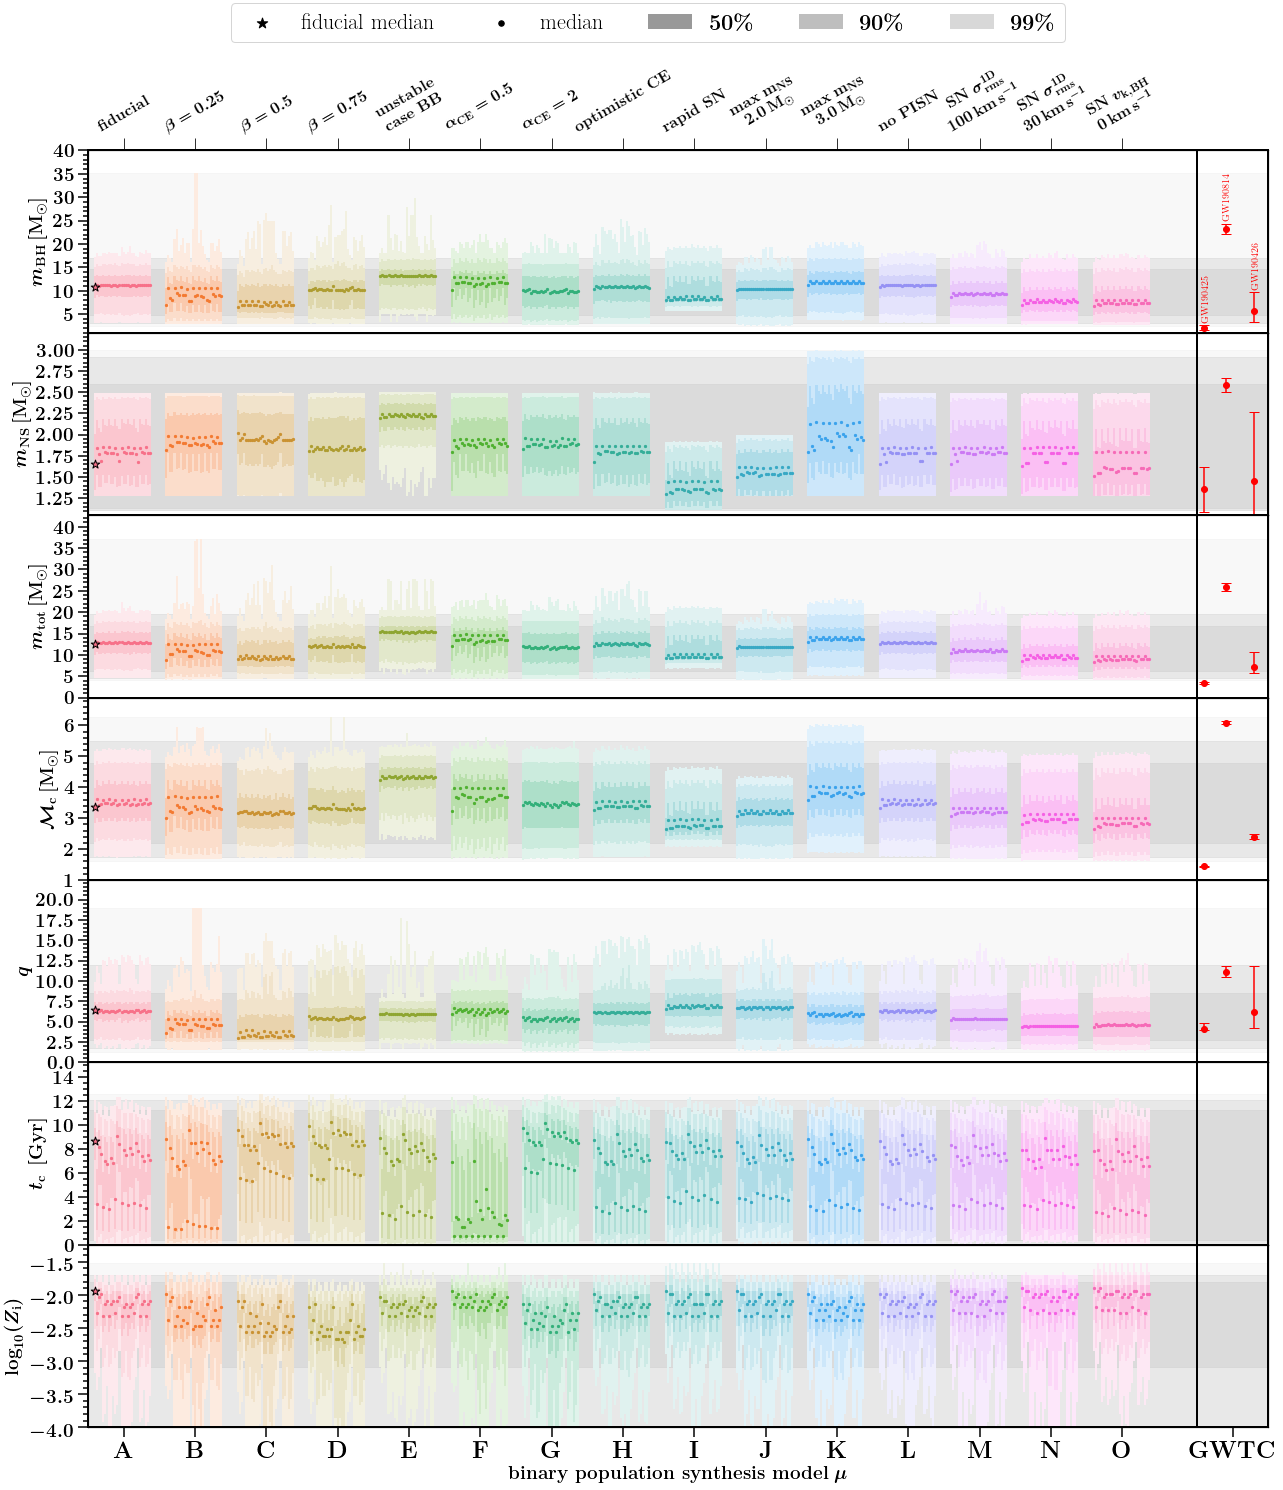

In [4]:


solar=0.0142
xright = 1+ 0.05 # extra space on the right 
NumberBPSmodels=15
alphabet = list(string.ascii_uppercase)
BPSnameslist = alphabet[:NumberBPSmodels]

pathQuantiles='/Users/floorbroekgaarden/Projects/BlackHole-NeutronStar/csvFiles/distributionQuantiles/'
pathGWTC = '/Users/floorbroekgaarden/Projects/BlackHole-NeutronStar/csvFiles/GWTC_Quantiles/'

DCOtype='BHNS'
ncols, nrows= 1,7
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(18,20), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


print('starting distribution quantile plot')
print('this might take some time since I need to loop through all model variations and plot colorranges - apologies')

xlabel = r'\textbf{binary population synthesis model} $\mu$'

ylabel = r'$m_{\rm{BH}}  \, [\rm{M}_{\odot}]$'
xvarind = 0 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[0],  ylim=[1,40], xlabel=xlabel, ylabel=ylabel,pathQuantiles=pathQuantiles, pathGWTC=pathGWTC)

ylabel = r'$m_{\rm{NS}}   \, [\rm{M}_{\odot}]$'
xvarind = 1 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[1],  ylim=[1.05,3.2], xlabel=xlabel, ylabel=ylabel,pathQuantiles=pathQuantiles, pathGWTC=pathGWTC)


ylabel = r'$m_{\rm{tot}}  \, [\rm{M}_{\odot}]$'
xvarind = 4 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[2],  ylim=[0,42.7], xlabel=xlabel, ylabel=ylabel,pathQuantiles=pathQuantiles, pathGWTC=pathGWTC)
print('halfway')
ylabel = r'$\mathcal{M}_{\rm{c}}  \, [\rm{M}_{\odot}]$'
xvarind = 5 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[3],  ylim=[1,6.9], xlabel=xlabel, ylabel=ylabel,pathQuantiles=pathQuantiles, pathGWTC=pathGWTC)


ylabel = r'$q$'
xvarind = 6 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[4],  ylim=[0.,22.4], xlabel=xlabel, ylabel=ylabel,pathQuantiles=pathQuantiles, pathGWTC=pathGWTC)



ylabel = r' $t_{\rm{c}}$ $ \, [{\rm{Gyr}}]$'
xvarind = 2
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[5],  ylim=[0,15.2], xlabel=xlabel, ylabel=ylabel,pathQuantiles=pathQuantiles, pathGWTC=pathGWTC)


ylabel = r'$\log_{10}(Z_{\rm{i}})$'
xvarind = 8 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[6],  ylim=[-4,np.log10(0.057)], xlabel=xlabel, ylabel=ylabel,pathQuantiles=pathQuantiles, pathGWTC=pathGWTC)



for ind_q, interval in enumerate([ 'median', '50percent', '90percent', '99percent']):

    xx_ = [-300, -200]
    yy_ = [-300, -200]

    if interval=='median':
#         if (ind_m==0) & (ind_mssfr==0):
        axe[0].scatter(xx_, yy_, \
                c='k', s=120, label='fiducial median', \
                marker='*', zorder=300, edgecolor='black')                        

        axe[0].scatter(xx_, yy_, \
                    c='k', s=120, label='median', \
                    marker='.', zorder=200)        
    else:


        if interval=='50percent':
            zorder = 110
            yy = yy_
            alpha = 0.4  
            label=r'$50\%$'
        elif interval=='90percent':
            zorder = 105
            yy = yy_
            alpha = 0.25    
            label =r'$90\%$'
        elif interval =='99percent':
            zorder = 102
            yy = yy_
            alpha = 0.15
            label=r'$99\%$'

        axe[0].bar(xx_, height=(yy[1]-yy[0]), bottom=yy[0], color='k', alpha=alpha, \
               width=0.5, zorder=zorder, label=label)


handles, labels = axe[0].get_legend_handles_labels()
    
axe[0].set_xlim(-0.5, 15+xright)
lgd = f.legend(handles, labels, fontsize=fs-2, ncol=9,\
                bbox_to_anchor=(.5, 1.04) , loc='upper center') #


plt.tight_layout()

f.subplots_adjust(wspace=0, hspace=0.0)

f.savefig('./QuantilePlot_BHNS.png', bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')
f.savefig('./QuantilePlot_BHNS.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')
plt.show()






